In [1]:
#Importing our dataset from csv file
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn import tree   
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn import metrics
import graphviz
from matplotlib import pyplot as plt


df=pd.read_csv("titanic-passengers.csv", sep=";")
names= df["Survived"].unique()
df


FileNotFoundError: [Errno 2] No such file or directory: 'titanic-passengers.csv'

In [ ]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
#Preprocessing our data
df['Age'].fillna(df['Age'].mean(),inplace=True)
df.replace({'Sex':{'male': 1,'female':0}},inplace=True)
df.replace({'Survived':{'Yes': 1,'No':0}},inplace=True)


In [ ]:
x = df[["Age","Sex","Pclass"]]
y = df[["Survived"]]

In [ ]:
#splitting data
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.20,random_state=10)

In [ ]:

#applying tree algorithm
model = tree.DecisionTreeClassifier()  
model.fit(x_train, y_train)
y_pred=model.predict(x_test)
print("Accuracy : ",accuracy_score(y_test, y_pred))


Accuracy :  0.8044692737430168


In [ ]:
'''ax = tree.export_graphviz(model , out_file=None)
graph = graphviz.Source(ax)

graph.render("df")
graph'''

'ax = tree.export_graphviz(model , out_file=None)\ngraph = graphviz.Source(ax)\n\ngraph.render("df")\ngraph'

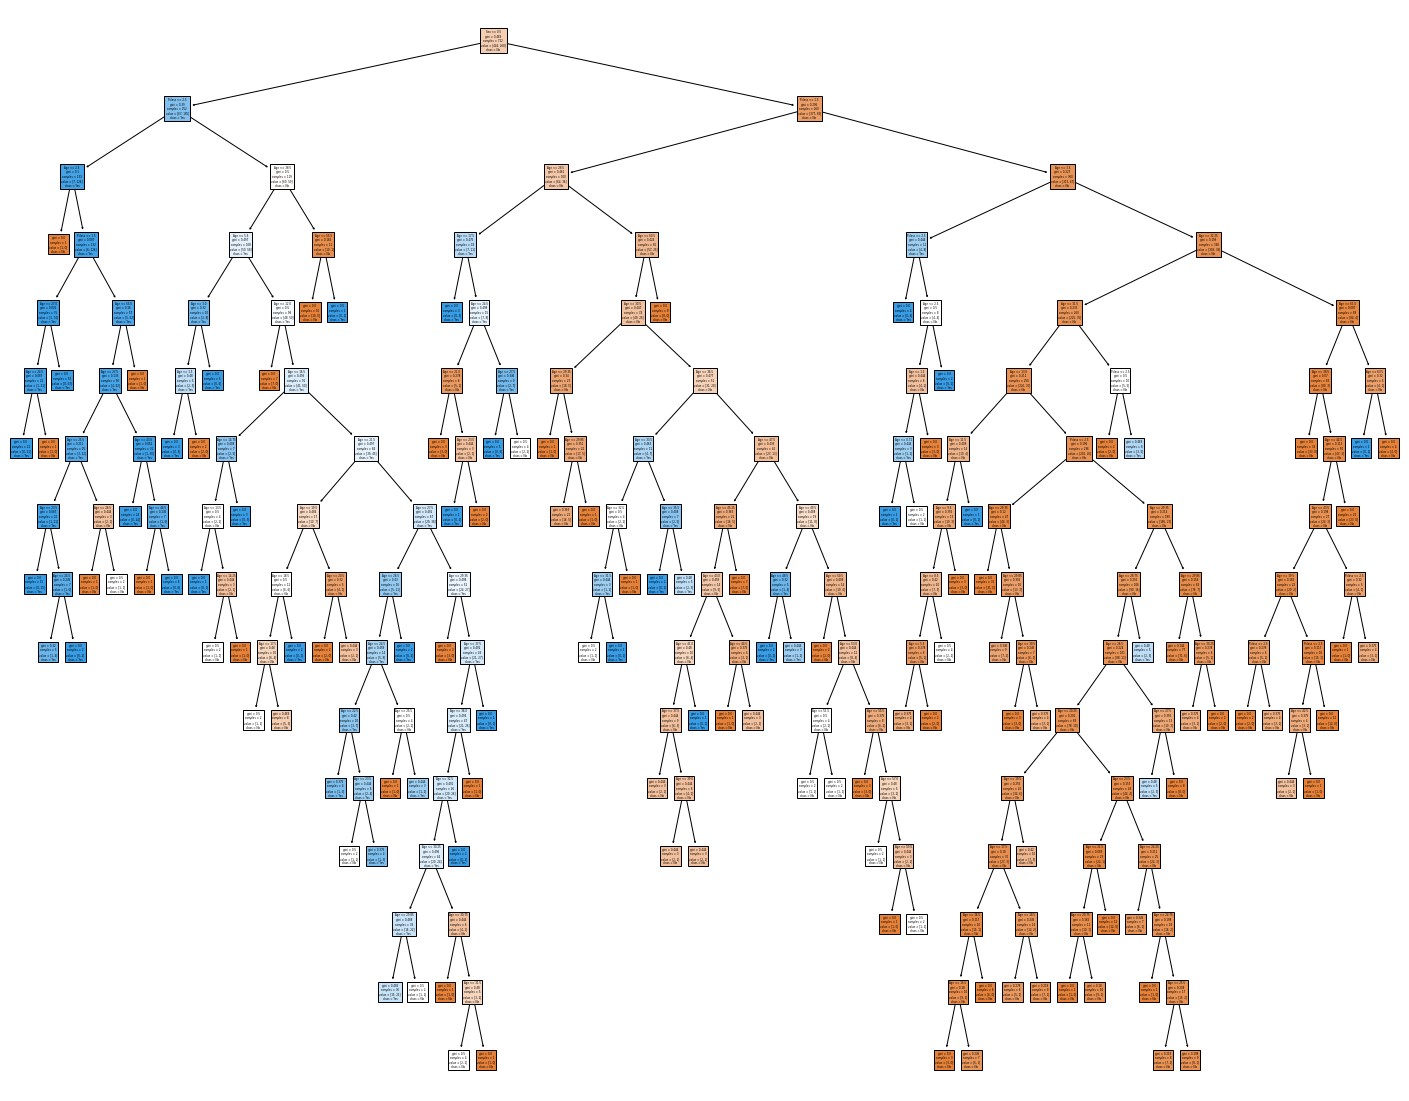

In [ ]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(model, 
                   feature_names=x.columns,  
                   class_names=names,
                   filled=True)

In [ ]:
model_1 = tree.DecisionTreeClassifier(criterion="gini" , splitter= 'random',max_leaf_nodes=6,max_depth=3)  
model_1.fit(x_train, y_train)
y_pred=model_1.predict(x_test)
print("Accuracy : ",accuracy_score(y_test, y_pred))

Accuracy :  0.770949720670391


in this case we have the same accuracy

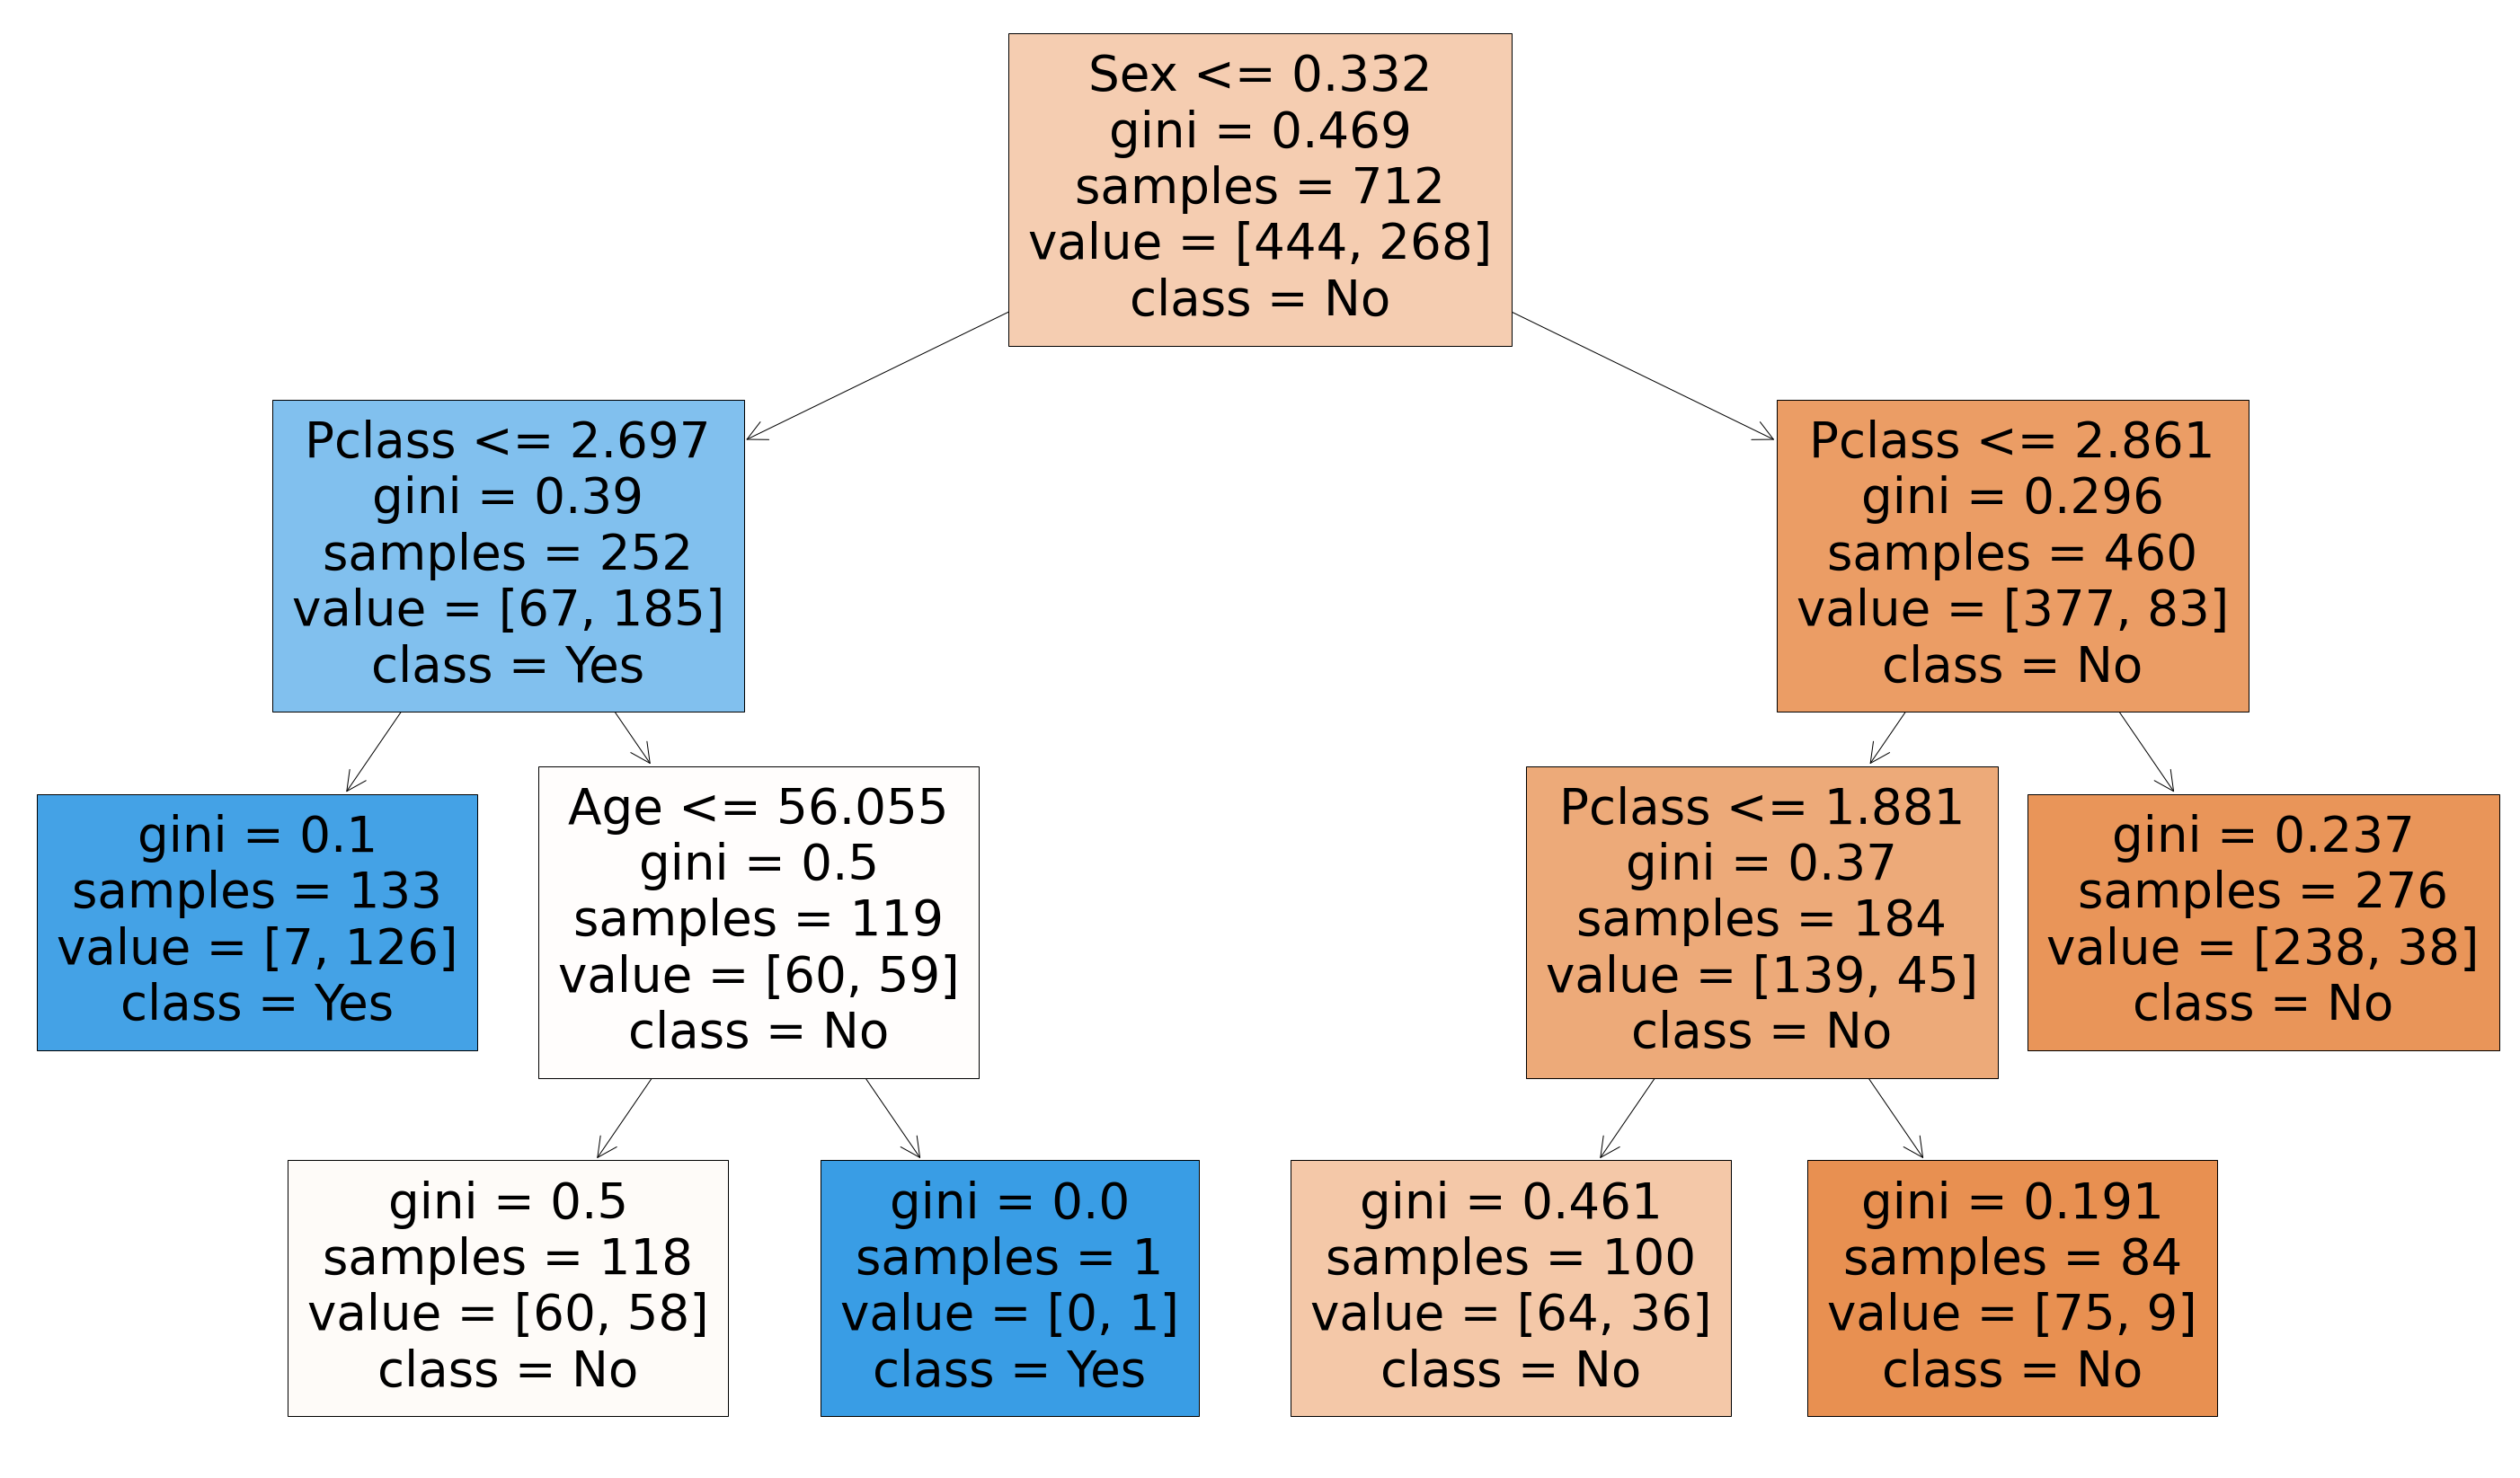

In [ ]:
fig = plt.figure(figsize=(50,30))
_ = tree.plot_tree(model_1, 
                   feature_names=x.columns,  
                   class_names=names,
                   filled=True)

# Random Forest 

In [ ]:
model_rf=RandomForestClassifier()  
model_rf.fit(x_train, y_train.values.ravel())
y_pred=model_rf.predict(x_test)  
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8044692737430168


In [ ]:
model_rf=RandomForestClassifier(n_estimators= 44)  
model_rf.fit(x_train, y_train.values.ravel())
y_pred=model_rf.predict(x_test)  
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7988826815642458
